In [26]:
# Group 29
# Assignment 6 | Author: Yash Kumar Sahu | Roll No: CED19I039 
# Assignment 6 | Author: Radhika Mittal | Roll No: CED19I050
# Assignment 6 | Author: Deep Patel | Roll No: ME21D0004

# Question

   1. Swap phase of the dog image and magnitude of the lena image and display the output.


   2. Swap phase of the lena image and magnitude of the dog image ad display the output.

## Libraries


In [27]:
from matplotlib import pyplot as plt                                              
import cv2
import glob
import os
import numpy as np
import ntpath
import math
import cmath

## Read Lena and Dog Image 

In [28]:
cwd = os.getcwd()                                            # get current directory
img_lena = cv2.imread(cwd+"/IMG_1114.jpg") 
gray_lena = cv2.cvtColor(img_lena, cv2.COLOR_BGR2GRAY)             # Convert to grayscale

img_dog = cv2.imread(cwd+"/IMG_1115.jpg") 
gray_dog = cv2.cvtColor(img_dog, cv2.COLOR_BGR2GRAY)             # Convert to grayscale


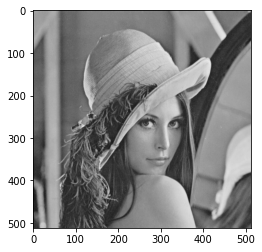

In [29]:
plt.imshow(gray_lena, cmap='gray', vmin = 0, vmax = 255)

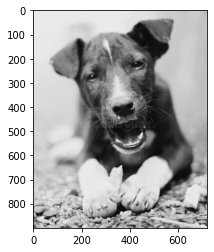

In [30]:
plt.imshow(gray_dog, cmap='gray', vmin = 0, vmax = 255)

## a. Write a function to implement FFT for 1D signal.

In [70]:
def DFT_1D(f_signal):
    n=len(f_signal)
    F_signal=np.zeros(n,dtype = 'complex_')
    for u in range(0,n):
        sum=0
        for x in range(0,n):
            sum+=f_signal[x]*cmath.exp(complex(0,-(2*math.pi*u*x)/n))
        F_signal[u]=sum
    return F_signal   

def FFT_1D(f_signal):
    m=len(f_signal)

    if m-1==0:
        return DFT_1D(f_signal[0:1])
    else:    
           
       
       even = f_signal[::2]
       odd  = f_signal[1::2]
      
       G=(FFT_1D(even)).copy()
       H=(FFT_1D(odd)).copy()
       
       F_signal=[]

       for u in range(0,int(m/2)):
         F1=G[u]+cmath.exp(complex(0,-(2*math.pi*u)/m))*H[u]
         F_signal.append(F1)
       for u in range(int(m/2),m):
         F2=G[u-int(m/2)]-cmath.exp(complex(0,-(2*math.pi*(u-int(m/2)))/m))*H[u-int(m/2)]
         F_signal.append(F2)
    return F_signal 

f_signal=[8,7,6,5,4,3,2,1]

print("User Defined :\n",FFT_1D(f_signal))
print("Predefined :\n",np.fft.fft(f_signal))    

User Defined :
 [(36+0j), (4-9.65685424949238j), (4-4j), (4-1.6568542494923797j), (4+0j), (4+1.6568542494923806j), (3.9999999999999996+4j), (3.9999999999999987+9.65685424949238j)]
Predefined :
 [36.+0.j          4.-9.65685425j  4.-4.j          4.-1.65685425j
  4.+0.j          4.+1.65685425j  4.+4.j          4.+9.65685425j]


## b. Implement DFT function for an image using the FFT for 1D signal using question 1.

## c. Consider the images of lena and dog images attached. Find phase and magnitude of the dog and lena images using the DFT function (in b).

## d. Compare the results with predefined function